In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def flexura_num(x,Te, p, rhoi=1000.0, rompida=False):
  """
  Solução numérica para equação de flexura
  """
  dx = x[1]-x[0] # Conta com intervalos regulares

  E = 1.0E11 # Modulo de elasticidade ou modulo de Young (PA)
  v = 0.25 # Coeficiente de Poisson (não tem unidade)
  g = 9.8 # aceleração da gravidade (m/s2)


  rhom = 3300.0 # Densidade do manto (kg/m3)
  drho = rhom-rhoi


  D = E*Te**3/(12*(1-v**2))

  n = np.size(x)

  A = np.zeros((n,n))
  A[range(n),range(n)] = 6*D + dx**4*drho*g
  A[range(n-1),range(1,n)] = -4*D
  A[range(1,n),range(n-1)] = -4*D

  A[range(n-2),range(2,n)] = D
  A[range(2,n),range(n-2)] = D

  if rompida == True:
    A[0,0] = 2*D + dx**4*drho*g
    A[0,2] = 2*D
    A[1,0] = -2*D
    A[1,1] = 5*D + dx**4*drho*g


  q = p*dx**4

  w = np.linalg.solve(A,q)

  return w


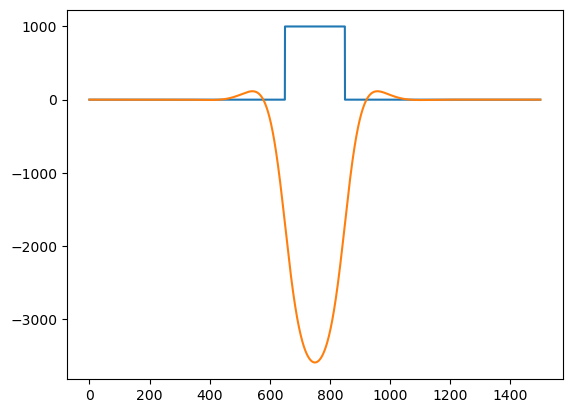

In [3]:
L = 1500e3
x = np.arange(0.0,L,500)
rhoc = 2700.0
rhoi = 2500.0
g = 9.8
Te = 10000.0

l = 200e3
h = x*0.0

cond = (x>L/2-l/2)&(x<L/2+l/2) # dims box
h[cond] = 1000 # box height

w = flexura_num(x, Te, -rhoc*g*h, rhoi)

plt.plot(x/ 1000,h)
plt.plot(x/ 1000,w)

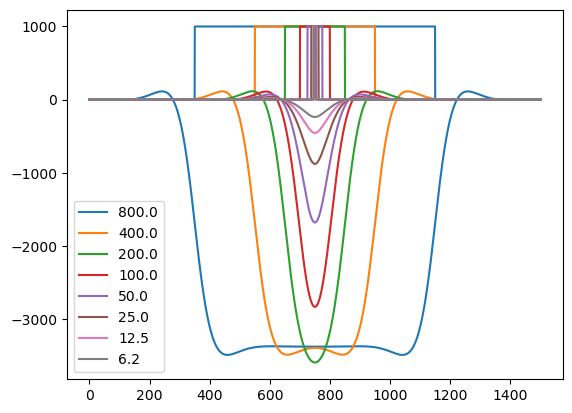

In [12]:
def flexural_load(x,l):
    h = x*0.0

    cond = (x>L/2-l/2)&(x<L/2+l/2) # dims box
    h[cond] = 1000 # box height

    w = flexura_num(x, Te, -rhoc*g*h, rhoi)

    return(w,h)

count = 0
width = 800e3 # in km

while count < 8:
    w, h = flexural_load(x, width)

    plt.plot(x/1000.0, h, "C%d"%(count), label="%.1f"%(width/1e3))
    plt.plot(x/1000.0, w, "C%d"%(count))

    count += 1
    width /= 2
 
plt.legend()
